In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdmolops
from rdkit.Chem import Descriptors

In [3]:
from rdkit.Chem import PandasTools
from IPython.core.display import HTML
PandasTools.RenderImagesInAllDataFrames(images=True)
pd.set_option('display.max_rows', 500)

In [4]:
# adapted from here https://kellerbits.net/wordpress/?p=326 great resource!!

#! python3 - Script1.py - Retrieve SMILES codes from PubChem API 

'''This script enables automatically connecting to the PubChem database, 
transfer of CAS numbers which are converted to CID identifiers
as first step and then resolved to respective SMILES codes.'''

# Import the library necessary for making a web service request.
from os import chdir
import urllib.request, urllib.error
import json
import time
import pandas as pd

# Define working directory

# Function for resolving given CAS number into CID. Therefore
# variables for PUG-REST request URL pieces are defined 
def name_to_cid(name):

    time.sleep(0)
    path_prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
    path_compound = '/compound/'
    path_name = 'name/'
    path_nameinput = name
    path_name_rest = '/cids/JSON'
    
    url = path_prolog + path_compound + path_name + path_nameinput + path_name_rest
# Make a PUG-REST request and store the output in "request"
    print('cas_to_cid:', url)
    try:
        request = urllib.request.urlopen(url)
    except urllib.error.HTTPError:
        print('HTTPError while requesting name', name)
        return ''
    
    # Give the output/reply back as JSON and return CID number from function
    if request is not None:
        reply = request.read()
        if reply is not None and len(reply) > 0:
            json_out = json.loads(reply)
            cid = json_out['IdentifierList']['CID'][0]
            return cid
    return ''

# Function for searching and extracting SMILES code with entering CID 
def cid_to_smiles(cid):
    
    time.sleep(0)
    path_prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
    path_compound = '/compound/'
    path_name = 'cid/'
    path_cid = str(cid)
    path_cid_rest = '/property/IsomericSMILES/JSON'
    
    url = path_prolog + path_compound + path_name + path_cid + path_cid_rest
        
    # Make a PUG-REST request and store the output in "request"
    print('cid_to_smiles:', url)
    try:
        request = urllib.request.urlopen(url)
    except urllib.error.HTTPError:
        print('HTTPError while requesting cid', cid)
        return ''
    
    # Give the reply in JSON format, access and return the SMILES code
    if request is not None:
        reply = request.read()
        if reply is not None and len(reply) > 0:
            json_out = json.loads(reply)
            #return json_out
            # smilescanonical = json_out['PropertyTable']['Properties'][0]['CanonicalSMILES']
            smilesisomeric = json_out['PropertyTable']['Properties'][0]['SMILES']
            return smilesisomeric
    return ''

# NOTE: to do this for many CAS numbers, iterate thru the given list and call above functions to 
# resolve to cid and, in turn, to SMILES. Sleep between each request to avoid overloading
# PubChem servers.

# Load list with CAS numbers where SMILES code is to be requested


In [5]:
#adapted from here https://greglandrum.github.io/rdkit-blog/posts/2022-12-23-descriptor-tutorial.html

def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule
    
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        # some of the descriptor functions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res

In [6]:
bb_df = pd.read_csv('aa_library.csv')
display(bb_df)
bb_df['cidsfromcas'] = [name_to_cid(name.replace(' ', '%20')) for name in bb_df['CAS']]
bb_df['smiles'] = [cid_to_smiles(cid) for cid in bb_df['cidsfromcas']]
display(bb_df)
bb_df.to_csv('aa_library_smiles.csv')
name_to_cid('627-03-2')
cid_to_smiles('7478')

,Name,CAS,abb
0,Fmoc-L-Ala-OH,35661-39-3,A1
1,Fmoc-L-Ser(tBu)-OH,71989-33-8,A2
2,Fmoc-L-Gln(Trt)-OH,132327-80-1,A3
3,Fmoc-L-Hse(Me)-OH,173212-86-7,A4
4,Fmoc-L-Trp(Boc)-OH,143824-78-6,A5
5,Fmoc-L-Dap(Boc)-OH,162558-25-0,A6
6,Boc-L-Dap(Fmoc)-OH,122235-70-5,A7


cas_to_cid: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/35661-39-3/cids/JSON
cas_to_cid: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/71989-33-8/cids/JSON
cas_to_cid: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/132327-80-1/cids/JSON
cas_to_cid: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/173212-86-7/cids/JSON
cas_to_cid: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/143824-78-6/cids/JSON
cas_to_cid: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/162558-25-0/cids/JSON
cas_to_cid: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/122235-70-5/cids/JSON
cid_to_smiles: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/6364642/property/IsomericSMILES/JSON
cid_to_smiles: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/3085671/property/IsomericSMILES/JSON
cid_to_smiles: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/10919157/property/IsomericSMILES/JSON
cid_to_smiles: https://pubchem.ncbi.nlm.nih.gov/re

,Name,CAS,abb,cidsfromcas,smiles
0,Fmoc-L-Ala-OH,35661-39-3,A1,6364642,C[C@@H](C(=O)O)NC(=O)OCC1C2=CC=CC=C2C3=CC=CC=C13
1,Fmoc-L-Ser(tBu)-OH,71989-33-8,A2,3085671,CC(C)(C)OCC(C(=O)O)NC(=O)OCC1C2=CC=CC=C2C3=CC=...
2,Fmoc-L-Gln(Trt)-OH,132327-80-1,A3,10919157,C1=CC=C(C=C1)C(C2=CC=CC=C2)(C3=CC=CC=C3)NC(=O)...
3,Fmoc-L-Hse(Me)-OH,173212-86-7,A4,51340500,COCC[C@@H](C(=O)O)NC(=O)OCC1C2=CC=CC=C2C3=CC=C...
4,Fmoc-L-Trp(Boc)-OH,143824-78-6,A5,9849766,CC(C)(C)OC(=O)N1C=C(C2=CC=CC=C21)C[C@@H](C(=O)...
5,Fmoc-L-Dap(Boc)-OH,162558-25-0,A6,2756103,CC(C)(C)OC(=O)NC[C@@H](C(=O)O)NC(=O)OCC1C2=CC=...
6,Boc-L-Dap(Fmoc)-OH,122235-70-5,A7,7019527,CC(C)(C)OC(=O)N[C@@H](CNC(=O)OCC1C2=CC=CC=C2C3...


cas_to_cid: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/627-03-2/cids/JSON
cid_to_smiles: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/7478/property/IsomericSMILES/JSON


'COC1=CC=C(C=C1)C(=O)O'

In [ ]:
bb_df = pd.read_csv('aa_library_smiles.csv')
bb_df

,Unnamed: 0,Name,CAS,abb,cidsfromcas,smiles
0,0,Fmoc-L-Ala-OH,35661-39-3,A1,6364642,C[C@@H](C(=O)O)NC(=O)OCC1C2=CC=CC=C2C3=CC=CC=C13
1,1,Fmoc-L-Ser(tBu)-OH,71989-33-8,A2,3085671,CC(C)(C)OCC(C(=O)O)NC(=O)OCC1C2=CC=CC=C2C3=CC=...
2,2,Fmoc-L-Gln(Trt)-OH,132327-80-1,A3,10919157,C1=CC=C(C=C1)C(C2=CC=CC=C2)(C3=CC=CC=C3)NC(=O)...
3,3,Fmoc-L-Hse(Me)-OH,173212-86-7,A4,51340500,COCC[C@@H](C(=O)O)NC(=O)OCC1C2=CC=CC=C2C3=CC=C...
4,4,Fmoc-L-Trp(Boc)-OH,143824-78-6,A5,9849766,CC(C)(C)OC(=O)N1C=C(C2=CC=CC=C21)C[C@@H](C(=O)...
5,5,Fmoc-L-Dap(Boc)-OH,162558-25-0,A6,2756103,CC(C)(C)OC(=O)NC[C@@H](C(=O)O)NC(=O)OCC1C2=CC=...
6,6,Boc-L-Dap(Fmoc)-OH,122235-70-5,A7,7019527,CC(C)(C)OC(=O)N[C@@H](CNC(=O)OCC1C2=CC=CC=C2C3...


In [ ]:
aadict = {}

for idx, aa in enumerate(bb_df['abb']):
    aadict[aa] = bb_df['smiles'][idx]

#cysteamine resins
aadict['1'] = 'SCCNC(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)=O'
aadict['2'] = 'SCCCNC(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)=O'
aadict['3'] = 'SCCCN(C)C(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)=O'
aadict['4'] = 'O=C(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)NC/C=C/CS'
aadict['5'] = 'O=C(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)N4CC(CS)C4'
aadict['6'] = 'O=C(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)N4CCC(S)CC4'
aadict['7'] = 'O=C(OCC1C2=C(C3=C1C=CC=C3)C=CC=C2)N4CCC(CS)CC4'

print(len(aadict))

aadict['A4']

14


'COCC[C@@H](C(=O)O)NC(=O)OCC1C2=CC=CC=C2C3=CC=CC=C13'

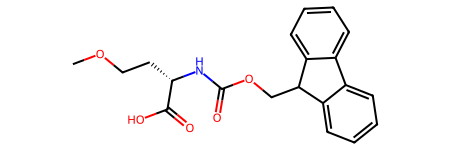

In [9]:
display(Chem.MolFromSmiles(aadict['A4']))

In [ ]:
acylrxn = AllChem.ReactionFromSmarts('([#6]-[#6](-[#6])(-[#8]-[#6](-[N:1])=[#8])-[#6]).([#8;H1]-[#6:2]=[#8:3])>>[N:1]-[#6:2]=[#8:3]')
caprxn = AllChem.ReactionFromSmarts('([#8]=[#6](-[#7:1])-[#8]-[#6]-[#6]1-[#6]2:[#6](-[#6]3:[#6]-1:[#6]:[#6]:[#6]:[#6]:3):[#6]:[#6]:[#6]:[#6]:2)>>[N:1]-[#6](=[#8])-[#6]')
peprxn = AllChem.ReactionFromSmarts('([#8]=[#6](-[#7:1])-[#8]-[#6]-[#6]1-[#6]2:[#6](-[#6]3:[#6]-1:[#6]:[#6]:[#6]:[#6]:3):[#6]:[#6]:[#6]:[#6]:2).([#8:3]=[#6:2]-[OH])>>[#8:3]=[#6:2]-[#7:1]')
rxnpeptoid = AllChem.ReactionFromSmarts('([C:1]-[#35]).([Nh2:2]-[C,N:3])>>[C:1]-[N:2](-[C,N:3])(-[#6](=[#8])-[#8]-[#6]-[#6]1-[#6]2:[#6](-[#6]3:[#6]-1:[#6]:[#6]:[#6]:[#6]:3):[#6]:[#6]:[#6]:[#6]:2)')
fmoctoboc = AllChem.ReactionFromSmarts('[#8]=[#6](-[#7:1])-[#8]-[#6]-[#6]1-[#6]2:[#6](-[#6]3:[#6]-1:[#6]:[#6]:[#6]:[#6]:3):[#6]:[#6]:[#6]:[#6]:2>>[#6]-[#6](-[#6])(-[#8]-[#6](-[N:1])=[#8])-[#6]')

def buildpep(seqraw):
    seq = seqraw.split(' ')
    print('this is the sequence: ' + seqraw)
    seq.reverse()

    while('' in seq):
        seq.remove("")

    if len(seq)<2:
        return aadict[seq[0]]
 
    else:

        product = Chem.MolFromSmiles(aadict[seq[0]])

        for aa in seq[1:]:
            # print(aa)
            
            reacts = (product,Chem.MolFromSmiles(aadict[aa]))
            products = peprxn.RunReactants(reacts) # tuple
            
            if len(products) == 0:
                products = rxnpeptoid.RunReactants(reacts)

            product = products[0][0]
            # display(product)

    # display(product)
    
    smile = Chem.MolToSmiles(product, kekuleSmiles = True)
    # product = Chem.MolFromSmiles(smile)
    return smile

buildpep('A1 A2 A3 A4 A5 A6 A7 2')

this is the sequence: A1 A2 A3 A4 A5 A6 A7 2


'COCC[C@H](NC(=O)[C@H](CCC(=O)NC(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1)NC(=O)C(COC(C)(C)C)NC(=O)[C@H](C)NC(=O)OCC1C2=CC=CC=C2C2=C1C=CC=C2)C(=O)N[C@@H](CC1=CN(C(=O)OC(C)(C)C)C2=C1C=CC=C2)C(=O)N[C@@H](CNC(=O)OC(C)(C)C)C(=O)NC[C@H](NC(=O)OC(C)(C)C)C(=O)NCCCS'

In [11]:
def removepgs(smile):
    mol = Chem.MolFromSmiles(smile)

    products = ['dummy']

    while len(products) != 0:
        
        products = []

        removetrt = AllChem.ReactionFromSmarts('[#8,#7:1]-[#6](-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)(-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1>>[#8,#7:1]')
        mols = removetrt.RunReactants((mol,))
        if len(mols) != 0:
            products.append(mols)

        removeboc = AllChem.ReactionFromSmarts('([#6]-[#6](-[#6])(-[#8]-[#6](-[#7:1])=[#8])-[#6])>>[#7H:1]')
        mols = removeboc.RunReactants((mol,))
        if len(mols) != 0:
            products.append(mols)

        mol = Chem.MolFromSmiles((Chem.MolToSmiles(mol)))
        removetbu = AllChem.ReactionFromSmarts('[#6;H3]-[#6](-[#6;H3])(-[#8:1])-[#6;H3]>>[#8:1]')
        mols = removetbu.RunReactants((mol,))
        if len(mols) != 0:
            products.append(mols)
        
        removefmoc = AllChem.ReactionFromSmarts('[#8]=[#6](-[#7:1])-[#8]-[#6]-[#6]1-[#6]2:[#6](-[#6]3:[#6]-1:[#6]:[#6]:[#6]:[#6]:3):[#6]:[#6]:[#6]:[#6]:2>>[N:1]-[#6]')
        mols = removefmoc.RunReactants((mol,))
        if len(mols) != 0:
            products.append(mols)

        if len(products) != 0:
            mol = products[0][0][0]
            # display(mol)

    # display(mol)
    smile = Chem.MolToSmiles(mol, kekuleSmiles = True)

    return smile

removepgs(buildpep('A1 A2 A3 A4 A5 A6 A7 2'))


this is the sequence: A1 A2 A3 A4 A5 A6 A7 2


'CN[C@@H](C)C(=O)NC(CO)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CCOC)C(=O)N[C@@H](CC1=CNC2=CC=CC=C12)C(=O)N[C@@H](C[NH])C(=O)NC[C@H]([NH])C(=O)NCCCS'

In [12]:
libdf = pd.read_csv('library.csv')
libdf

,plate,well,seqs
0,1,A1,A1 A2 A3 A4 A5 A6 A7
1,1,B1,A2 A4 A6 A1 A3 A5 A7
2,2,A1,A4 A1 A5 A2 A6 A3 A7


In [13]:
libdf['smiles'] = libdf['seqs'].apply(lambda x: removepgs(buildpep(x)))
libdf['em'] = [getMolDescriptors(Chem.MolFromSmiles(product))['ExactMolWt'] for product in libdf['smiles']]
libdf.to_csv('library_smiles.csv')
libdf

this is the sequence: A1 A2 A3 A4 A5 A6 A7
this is the sequence: A2 A4 A6 A1 A3 A5 A7
this is the sequence: A4 A1 A5 A2 A6 A3 A7


,plate,well,seqs,smiles,em
0,1,A1,A1 A2 A3 A4 A5 A6 A7,CN[C@@H](C)C(=O)NC(CO)C(=O)N[C@@H](CCC(N)=O)C(...,789.376951
1,1,B1,A2 A4 A6 A1 A3 A5 A7,CNC(CO)C(=O)N[C@@H](CCOC)C(=O)N[C@@H](C[NH])C(...,789.376951
2,2,A1,A4 A1 A5 A2 A6 A3 A7,CN[C@@H](CCOC)C(=O)N[C@@H](C)C(=O)N[C@@H](CC1=...,789.376951


this is the sequence:  A1
this is the sequence:  A2
this is the sequence:  A3
this is the sequence:  A4
this is the sequence:  A5
this is the sequence:  A6
this is the sequence:  A7
this is the sequence:  A1 A2
this is the sequence:  A1 A3
this is the sequence:  A1 A4
this is the sequence:  A1 A5
this is the sequence:  A1 A6
this is the sequence:  A1 A7
this is the sequence:  A2 A3
this is the sequence:  A2 A4
this is the sequence:  A2 A5
this is the sequence:  A2 A6
this is the sequence:  A2 A7
this is the sequence:  A3 A4
this is the sequence:  A3 A5
this is the sequence:  A3 A6
this is the sequence:  A3 A7
this is the sequence:  A4 A5
this is the sequence:  A4 A6
this is the sequence:  A4 A7
this is the sequence:  A5 A6
this is the sequence:  A5 A7
this is the sequence:  A6 A7
this is the sequence:  A1 A2 A3
this is the sequence:  A1 A2 A4
this is the sequence:  A1 A2 A5
this is the sequence:  A1 A2 A6
this is the sequence:  A1 A2 A7
this is the sequence:  A1 A3 A4
this is the seque

,trunc seq,smiles,em,mol
0,A1,CN[C@@H](C)C(=O)O,103.063329,
5,A6,CN[C@@H](C[NH])C(=O)O,117.066403,
6,A7,CNC[C@H]([NH])C(=O)O,117.066403,
1,A2,CNC(CO)C(=O)O,119.058243,
3,A4,CN[C@@H](CCOC)C(=O)O,147.089543,
2,A3,CN[C@@H](CCC(N)=O)C(=O)O,160.084792,
12,A1 A7,CN[C@@H](C)C(=O)NC[C@H]([NH])C(=O)O,188.103516,
11,A1 A6,CN[C@@H](C)C(=O)N[C@@H](C[NH])C(=O)O,188.103516,
7,A1 A2,CN[C@@H](C)C(=O)NC(CO)C(=O)O,190.095357,
27,A6 A7,CN[C@@H](C[NH])C(=O)NC[C@H]([NH])C(=O)O,202.106590,

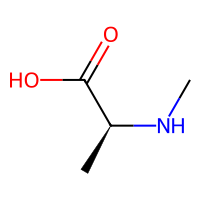
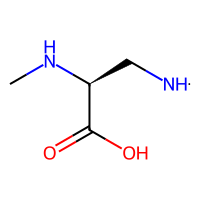
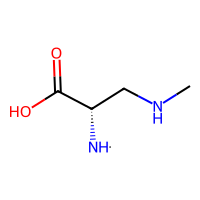
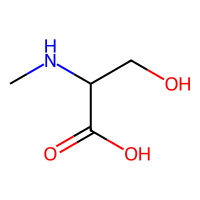
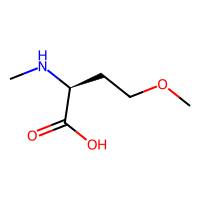
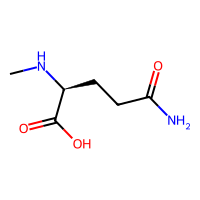
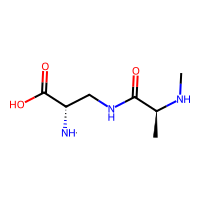
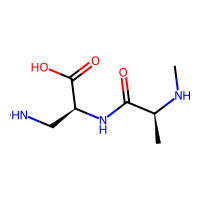
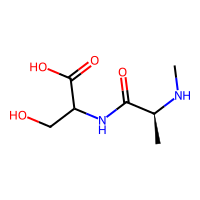
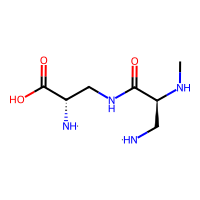
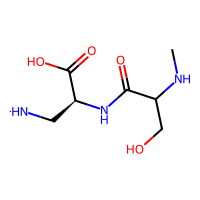
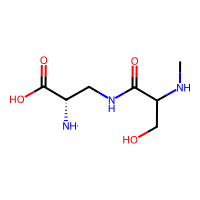
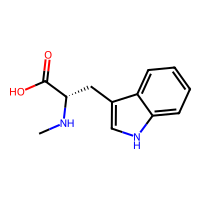
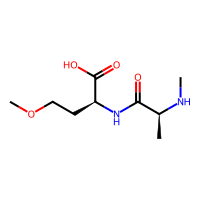
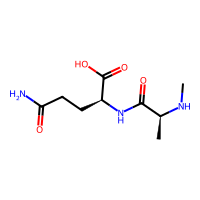
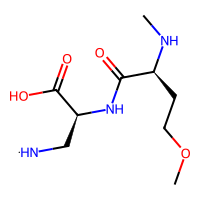
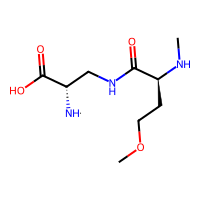
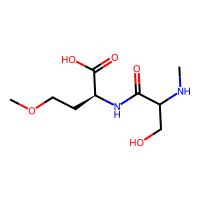
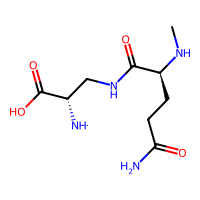
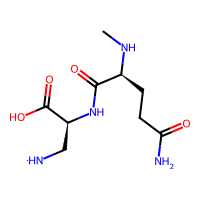
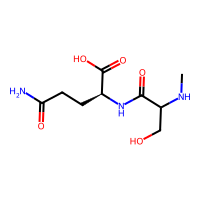
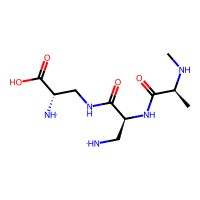
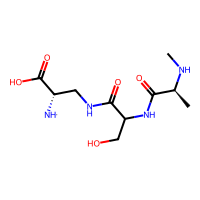
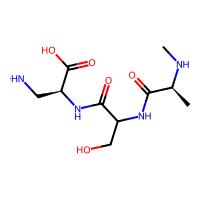
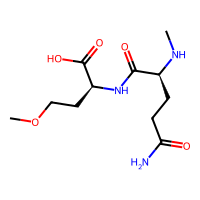
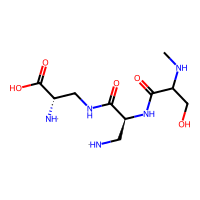
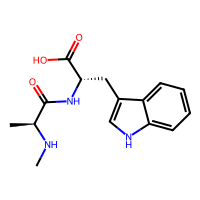
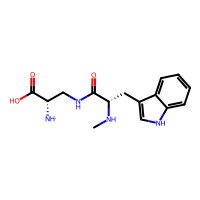
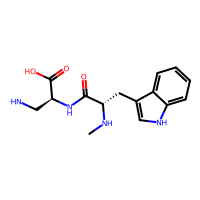
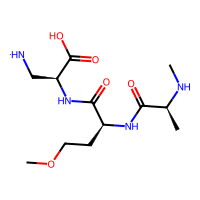
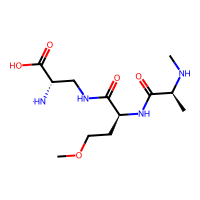
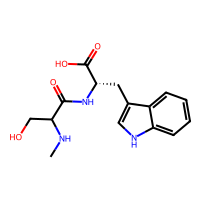
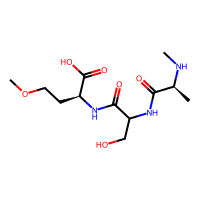
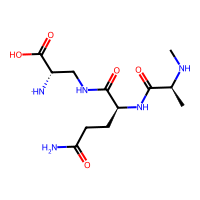
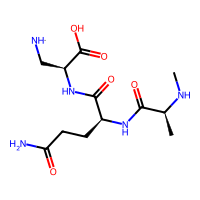
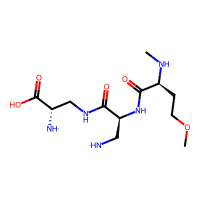
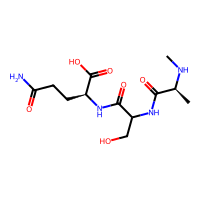
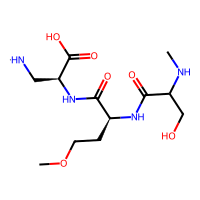
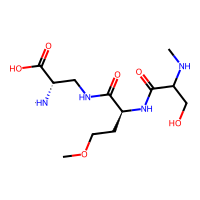
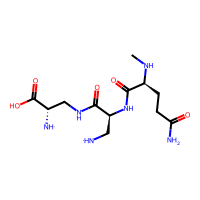
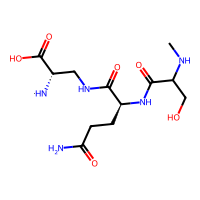
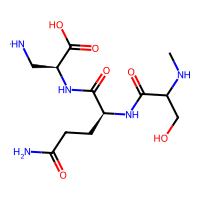
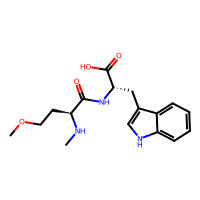
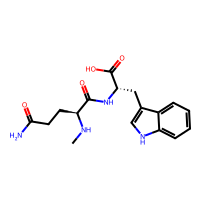
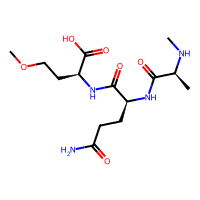
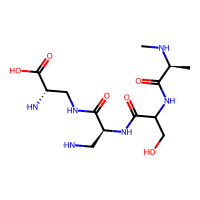
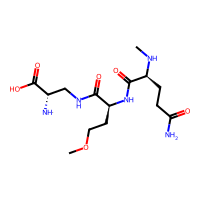
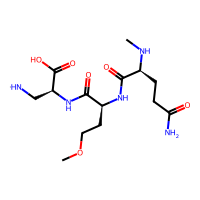
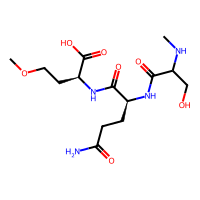
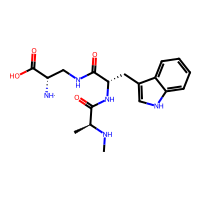
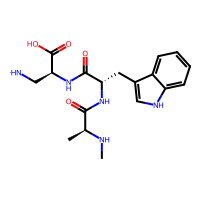
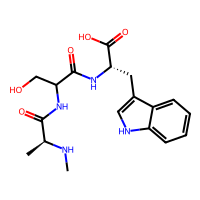
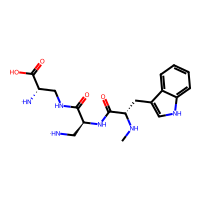
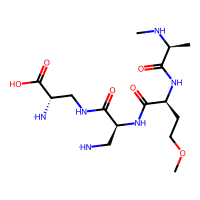
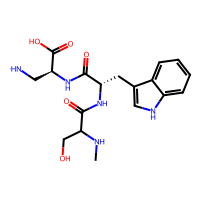
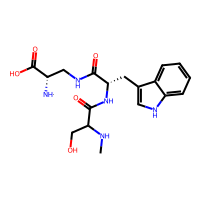
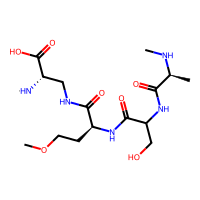
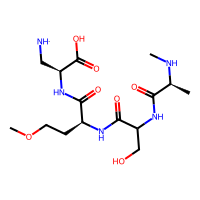
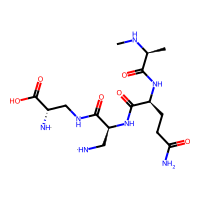
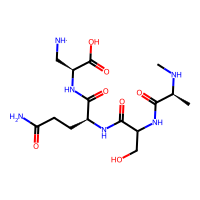
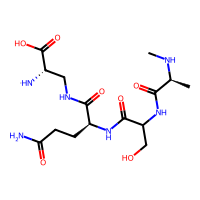
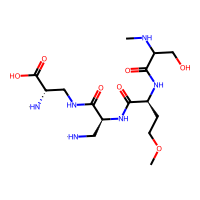
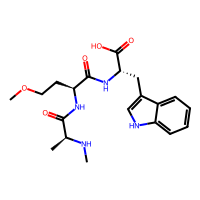
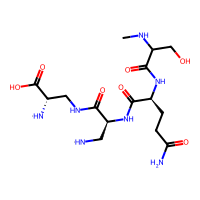
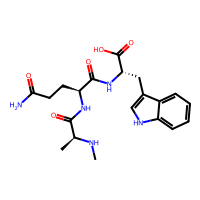
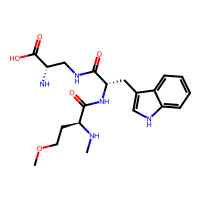
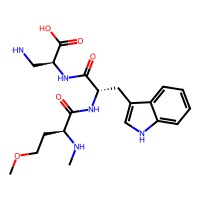
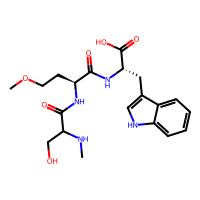
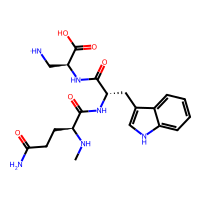
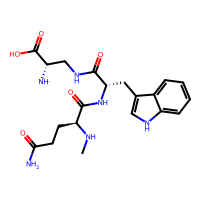
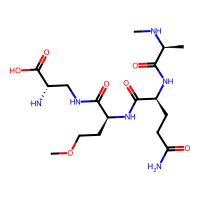
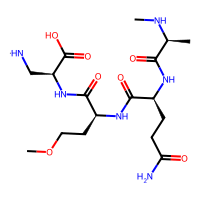
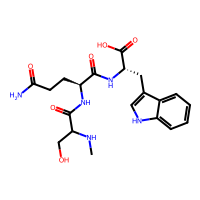
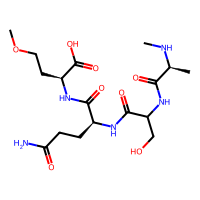
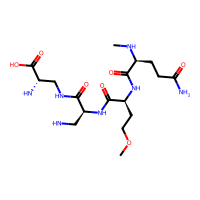
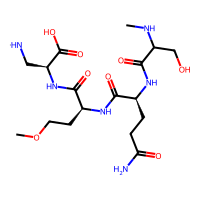
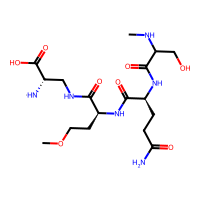
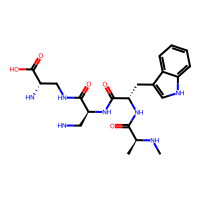
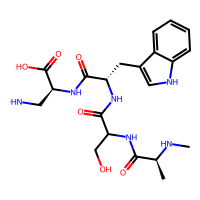
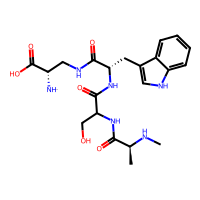
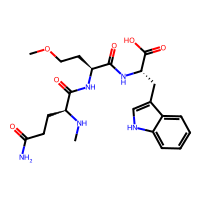
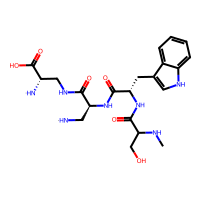
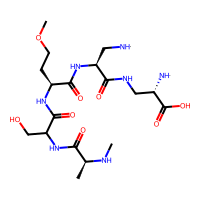
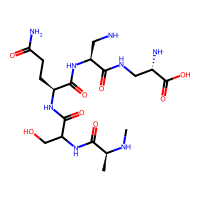
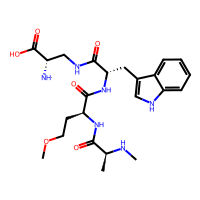
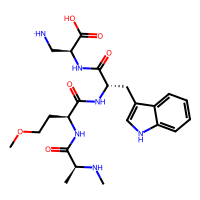
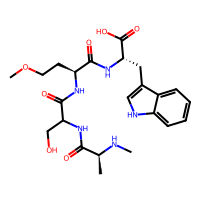
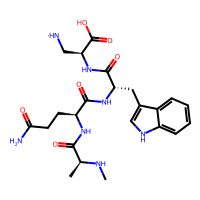
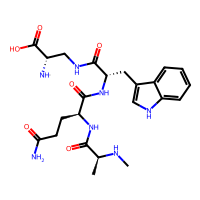
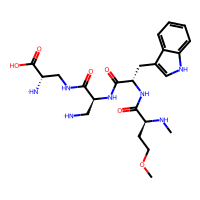
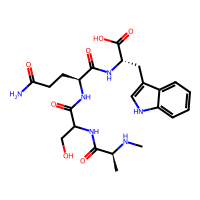
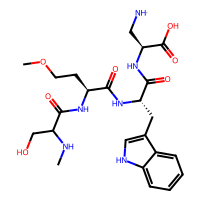
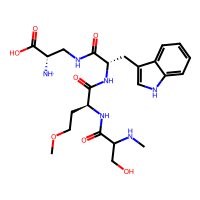
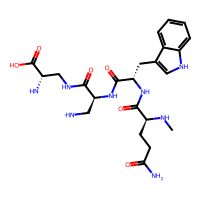
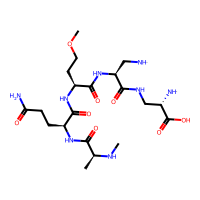
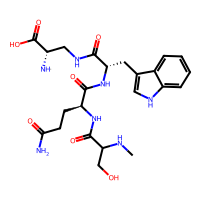
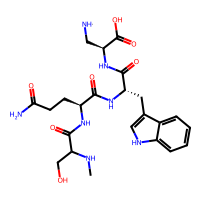
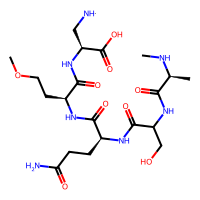
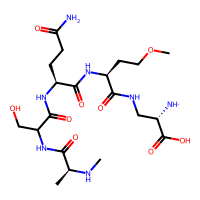
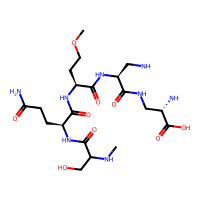
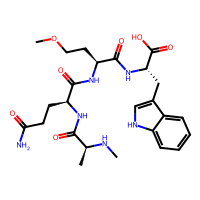
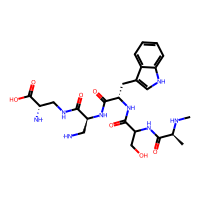
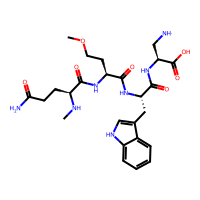
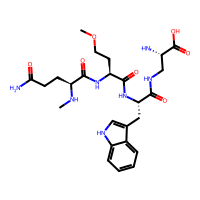
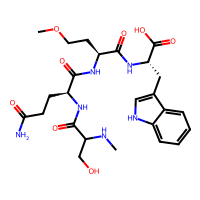
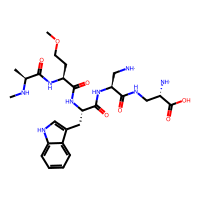
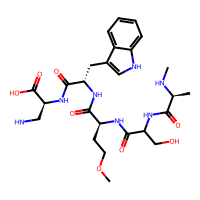
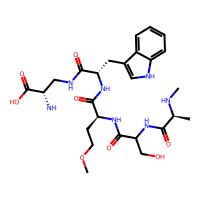
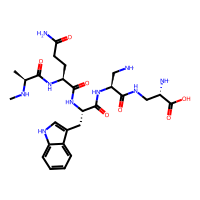
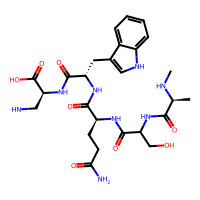
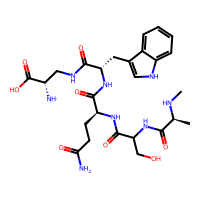
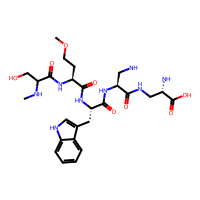
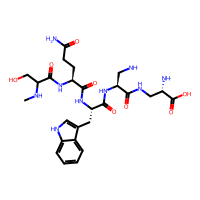
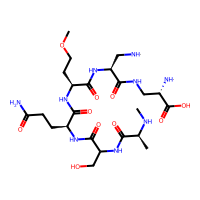
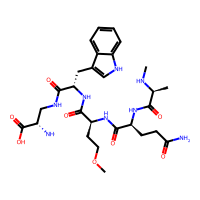
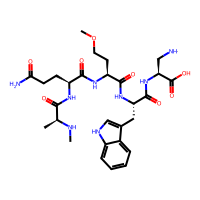
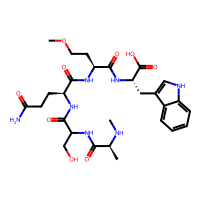
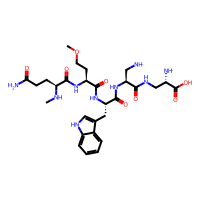
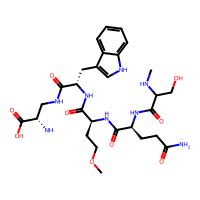
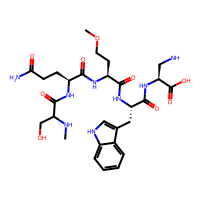
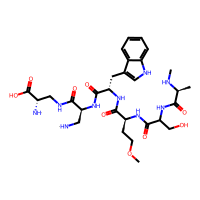
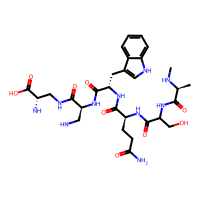
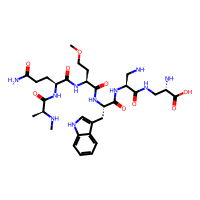
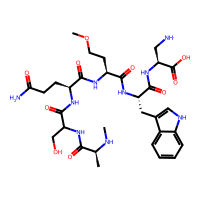
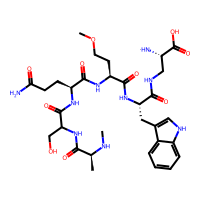
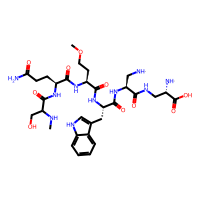
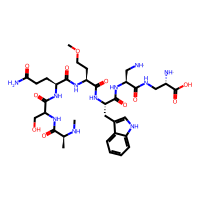

In [14]:
import itertools as it

seq = 'A1 A2 A3 A4 A5 A6 A7'

truncs = []
for i in range(len(seq.split(' '))):
    x = it.combinations(range(len(seq.split(' '))),i+1)
    for s in list(x):
        truncs.append(s)

# display(truncs)

seqs = []
smiles = []

for i in truncs:
    seq_t = ''
    for e in i:
        # print(e)
        seq_t += ' ' + seq.split(' ')[e]
    seq_t = seq_t #add resin bc no truncations without resin are possible
    smile = removepgs(buildpep(seq_t))
    seqs.append(seq_t)
    smiles.append(smile)
products = pd.DataFrame(data={'trunc seq': seqs, 'smiles': smiles})
# products['mol'] = [Chem.MolFromSmiles(smile) for smile in products['smiles']]
products['em'] = [getMolDescriptors(Chem.MolFromSmiles(product))['ExactMolWt'] for product in products['smiles']]
products = products.sort_values(by='em')
products['mol'] = [Chem.MolFromSmiles(product) for product in products['smiles']]
products